In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**PCA I FAKTORSKA ANALIZA**

In [47]:
data = pd.read_csv('final_weekly_returns.csv', index_col='timestamp')
data

,btc-bitcoin,eth-ethereum,usdt-tether,ada-cardano,bnb-binance-coin,xrp-xrp,doge-dogecoin,bch-bitcoin-cash,ltc-litecoin,link-chainlink,...,sls-salus,sno-savenode,spx-sp-500,sop-sopay,spank-spankchain,sphr-sphere,cen-centaure,cc-cybercoin,moneta-moneta,idh-indahash
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-10-14 00:00:00+00:00,-0.050142,-0.118952,-0.019802,-0.116748,-0.088035,-0.126140,-0.080240,-0.131674,-0.085648,-0.045628,...,-0.046919,-0.374390,-0.043366,-0.072660,-0.122240,-0.005649,0.111537,0.307692,0.070707,-0.147783
2018-10-21 00:00:00+00:00,0.041566,0.044321,0.000000,0.059580,0.029462,0.105846,-0.113374,0.014621,0.008175,0.161747,...,0.091998,-0.251542,-0.000361,-0.097584,0.059917,0.170467,-0.284238,0.000000,0.000000,0.023947
2018-10-28 00:00:00+00:00,-0.000894,-0.005215,0.020202,-0.046624,-0.008180,-0.001324,-0.100130,-0.022614,-0.020978,0.183164,...,0.204521,-0.563465,-0.035411,-0.036456,-0.084430,0.501238,-0.247292,-0.147059,-0.344340,0.093548
2018-11-04 00:00:00+00:00,-0.028426,-0.023087,-0.019802,0.004761,-0.022924,-0.013456,-0.107659,0.204102,0.000067,0.162131,...,-0.070244,-0.524892,0.020509,-0.136721,-0.134989,-0.244335,-0.350919,0.051724,0.007194,-0.038643
2018-11-11 00:00:00+00:00,0.000155,0.038994,0.000000,0.019114,-0.013792,0.099539,-0.140081,0.004790,-0.023631,-0.008288,...,-0.072005,0.000162,0.020097,-0.207284,-0.141697,-0.163610,-0.258621,0.049180,0.307143,0.030991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-02 00:00:00+00:00,0.144037,0.294335,0.000000,0.197870,0.237187,0.485080,0.416620,0.266390,0.193858,0.249795,...,0.015733,0.150391,0.002916,-0.066225,0.211760,0.182149,0.000000,-0.024000,0.468944,0.051466
2021-05-09 00:00:00+00:00,0.020887,0.329138,0.000000,0.299102,0.063239,-0.034729,0.433626,0.382300,0.315223,0.237769,...,-0.072476,0.006791,-0.004226,0.028369,0.148269,0.188762,0.118952,0.155738,0.207188,-0.208481
2021-05-16 00:00:00+00:00,-0.177889,-0.049192,0.000000,0.321954,-0.122399,-0.008096,-0.055921,-0.113356,-0.137525,-0.144160,...,-0.246952,-0.069140,0.001849,-0.089655,-0.292507,-0.290375,-0.091892,0.397163,-0.215412,0.352183


In [48]:
S = data.cov()
S

,btc-bitcoin,eth-ethereum,usdt-tether,ada-cardano,bnb-binance-coin,xrp-xrp,doge-dogecoin,bch-bitcoin-cash,ltc-litecoin,link-chainlink,...,sls-salus,sno-savenode,spx-sp-500,sop-sopay,spank-spankchain,sphr-sphere,cen-centaure,cc-cybercoin,moneta-moneta,idh-indahash
btc-bitcoin,0.011282,0.012005,0.000016,0.010903,0.012701,0.009064,0.009804,0.016738,0.013130,0.011193,...,0.010667,0.013622,0.000559,0.008087,0.010490,0.012042,0.011154,0.007668,0.018706,0.002184
eth-ethereum,0.012005,0.020030,0.000055,0.017641,0.015714,0.014163,0.014452,0.023351,0.016727,0.017304,...,0.012276,0.017013,0.001008,0.010760,0.021145,0.015228,0.015706,0.012095,0.027330,0.003334
usdt-tether,0.000016,0.000055,0.000041,0.000050,0.000028,0.000056,0.000514,0.000179,0.000068,0.000010,...,0.000092,-0.000262,0.000014,-0.000070,0.000055,0.000182,-0.000319,-0.000059,-0.000001,0.000049
ada-cardano,0.010903,0.017641,0.000050,0.029707,0.018842,0.014517,0.016652,0.023616,0.016083,0.015683,...,0.009825,0.013913,0.001194,0.010916,0.014859,0.018356,0.013354,0.018229,0.037897,0.014141
bnb-binance-coin,0.012701,0.015714,0.000028,0.018842,0.035438,0.015793,0.013832,0.021147,0.017616,0.016027,...,0.014718,0.013982,0.000883,0.023478,0.019700,0.022204,0.009896,0.001354,0.031757,0.008566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sphr-sphere,0.012042,0.015228,0.000182,0.018356,0.022204,0.018965,0.015571,0.017303,0.017901,0.018393,...,0.010269,-0.002205,0.000623,0.012697,0.011832,0.097146,0.017346,0.030900,0.034980,0.002956
cen-centaure,0.011154,0.015706,-0.000319,0.013354,0.009896,0.011587,0.003160,0.021689,0.016388,0.027975,...,0.008748,0.023393,0.001500,-0.003540,0.010766,0.017346,0.137247,0.008705,0.023948,0.000795
cc-cybercoin,0.007668,0.012095,-0.000059,0.018229,0.001354,0.019754,0.031465,0.020012,0.014438,0.009776,...,0.013115,0.000995,0.000594,0.009898,-0.009408,0.030900,0.008705,0.197104,0.039429,-0.012950
moneta-moneta,0.018706,0.027330,-0.000001,0.037897,0.031757,0.012655,0.068584,0.031527,0.020182,0.011526,...,0.009728,0.013444,0.002218,-0.000314,0.032477,0.034980,0.023948,0.039429,0.390605,-0.023405


**FUNKCIJA**

In [164]:
def rp_pca_calc(data, num_factors, gamma):
    
    S = ((data + gamma*data.mean()).T @ (data + gamma*data.mean())) * (1 / (data.shape[0]-1))
    
    values, vectors = np.linalg.eigh(S)
    
    evalues = values[::-1]
    evalues = evalues[:num_factors]

    
    evectors = vectors[:, ::-1]
    evectors = evectors[:, :num_factors]

    loadings = evectors * np.sqrt(evalues) * np.sign(np.sum(evectors, axis=0))
    
    factors = (np.linalg.inv(loadings.T @ loadings) @ loadings.T @ data.T).T
    
    return loadings, factors

**3-faktorski i 5-faktorski PCA model**

In [165]:
loadings_3, factors_3 = rp_pca_calc(data, num_factors=3, gamma=-1)

In [166]:
pd.DataFrame(loadings_3)

,0,1,2
0,0.086311,0.012659,-0.005434
1,0.113017,0.019592,0.005645
2,0.000576,0.000391,-0.000026
3,0.118811,0.021524,0.015975
4,0.140954,0.003551,0.007154
...,...,...,...
849,0.131502,0.001279,-0.005094
850,0.101480,0.004226,0.010341
851,0.051252,0.027896,0.034772
852,0.182408,0.273072,0.068555


Text(0, 0.5, 'Loadings')

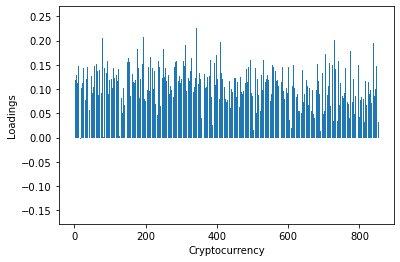

In [167]:
x = range(loadings_3.shape[0])
plt.bar(x, loadings_3[:,0])
plt.xlabel("Cryptocurrency")
plt.ylabel("Loadings")

In [168]:
idx = np.argmax(loadings_3[:,0])
data.columns[idx]

'egt-egretia'

<BarContainer object of 854 artists>

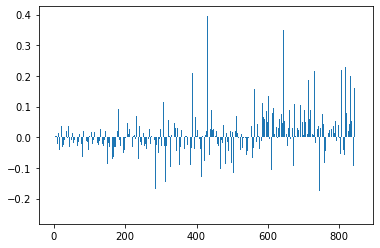

In [169]:
x = range(loadings_3.shape[0])
plt.bar(x, loadings_3[:,1])

In [170]:
idx = np.argmax(loadings_3[:,1])
data.columns[idx]


'max-maxcoin'

<BarContainer object of 854 artists>

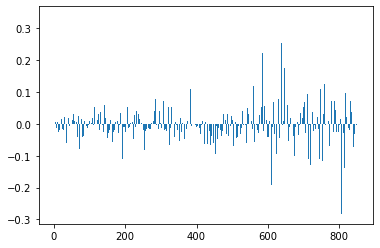

In [171]:
x = range(loadings_3.shape[0])
plt.bar(x, loadings_3[:,2])

In [172]:
loadings_5, factors_5 = rp_pca_calc(data, num_factors=5, gamma=-1)

In [173]:
factors_5.cov()

,0,1,2,3,4
0,1.000000e+00,7.133851e-17,-1.728406e-16,9.401196e-16,1.916167e-16
1,7.133851e-17,1.000000e+00,1.183047e-16,5.802391e-17,-1.488587e-16
2,-1.728406e-16,1.183047e-16,1.000000e+00,1.567194e-16,1.750911e-17
3,9.401196e-16,5.802391e-17,1.567194e-16,1.000000e+00,2.750271e-16
4,1.916167e-16,-1.488587e-16,1.750911e-17,2.750271e-16,1.000000e+00


**3-faktorski i 5-faktorski RP-PCA model**

In [174]:
gamma = 5

In [175]:
rp_loadings_3, rp_factors_3 = rp_pca_calc(data, num_factors=3, gamma=gamma)

In [176]:
pd.DataFrame(loadings_3)

,0,1,2
0,0.086311,0.012659,-0.005434
1,0.113017,0.019592,0.005645
2,0.000576,0.000391,-0.000026
3,0.118811,0.021524,0.015975
4,0.140954,0.003551,0.007154
...,...,...,...
849,0.131502,0.001279,-0.005094
850,0.101480,0.004226,0.010341
851,0.051252,0.027896,0.034772
852,0.182408,0.273072,0.068555


Text(0, 0.5, 'Loadings')

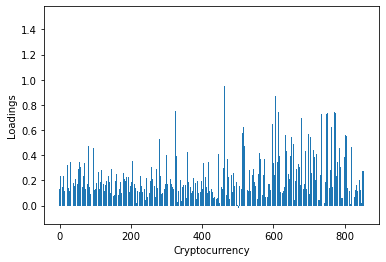

In [177]:
x = range(rp_loadings_3.shape[0])
plt.bar(x, rp_loadings_3[:,0])
plt.xlabel("Cryptocurrency")
plt.ylabel("Loadings")

In [178]:
idx = np.argmax(rp_loadings_3[:,0])
print(idx)
data.columns[idx]

431


'max-maxcoin'

<BarContainer object of 854 artists>

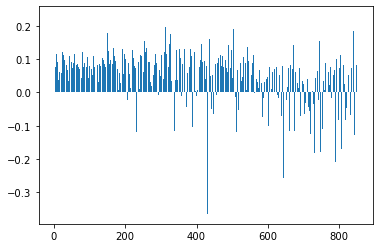

In [179]:
x = range(rp_loadings_3.shape[0])
plt.bar(x, rp_loadings_3[:,1])

In [180]:
idx = np.argmax(rp_loadings_3[:,1])
print(idx)
data.columns[idx]

300


'egt-egretia'

<BarContainer object of 854 artists>

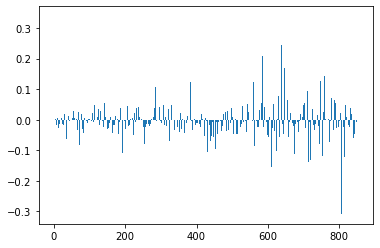

In [181]:
x = range(rp_loadings_3.shape[0])
plt.bar(x, rp_loadings_3[:,2])

In [182]:
rp_loadings_5, rp_factors_5 = rp_pca_calc(data, num_factors=5, gamma=gamma)

**REZULTATI** - Sharpe ratio

In [183]:
sharpe_ratio3 = pd.DataFrame(index=['PCA 3 factors', 'RP-PCA 3 factors'], columns=['SR1', 'SR2', 'SR3'])
sharpe_ratio3.iloc[0] = factors_3.mean() / factors_3.std()
sharpe_ratio3.iloc[1] = rp_factors_3.mean() / rp_factors_3.std()
sharpe_ratio3

,SR1,SR2,SR3
PCA 3 factors,0.289982,0.332837,0.031508
RP-PCA 3 factors,0.565551,-0.036169,0.001943


In [184]:
sharpe_ratio5 = pd.DataFrame(index=['PCA 5 factors', 'RP-PCA 5 factors'], columns=['SR1', 'SR2', 'SR3', 'SR4', 'SR5'])
sharpe_ratio5.iloc[0] = factors_5.mean() / factors_5.std()
sharpe_ratio5.iloc[1] = rp_factors_5.mean() / rp_factors_5.std()
sharpe_ratio5

,SR1,SR2,SR3,SR4,SR5
PCA 5 factors,0.289982,0.332837,0.031508,-0.076381,0.123562
RP-PCA 5 factors,0.565551,-0.036169,0.001943,-0.012159,-0.005552


**REZULTATI** - RMS_alpha

In [185]:
print(loadings_3.shape)
factors_3.shape

(854, 3)


(138, 3)

In [186]:
data_recovered = factors_3 @ loadings_3.T
residuals = pd.DataFrame(data.values - data_recovered.values)
residuals

,0,1,2,3,4,5,6,7,8,9,...,844,845,846,847,848,849,850,851,852,853
0,-0.014312,-0.071627,-0.019594,-0.066525,-0.026847,-0.074174,-0.046037,-0.063340,-0.034861,0.004213,...,-0.002523,-0.331214,-0.040562,-0.015442,-0.052193,0.050981,0.155709,0.329010,0.125509,-0.133451
1,-0.013311,-0.027520,-0.000249,-0.016492,-0.068218,0.015853,-0.125946,-0.094115,-0.072916,0.080500,...,0.022340,-0.317774,-0.004390,-0.204507,-0.058757,0.079612,-0.354386,-0.028136,-0.028005,0.004429
2,-0.025611,-0.044036,0.020011,-0.092414,-0.055208,-0.037713,-0.140614,-0.066067,-0.051568,0.146525,...,0.171826,-0.606464,-0.037615,-0.052583,-0.153944,0.463264,-0.283807,-0.181747,-0.452793,0.064314
3,-0.012456,0.000745,-0.019750,0.032384,0.010761,0.019958,-0.121359,0.236459,0.023454,0.190274,...,-0.047744,-0.498371,0.021652,-0.105434,-0.081353,-0.215742,-0.325563,0.067758,0.016448,-0.024076
4,0.003563,0.044100,0.000034,0.024937,-0.008157,0.102996,-0.129575,0.010384,-0.019655,-0.004084,...,-0.067855,0.005346,0.020425,-0.206610,-0.134957,-0.158921,-0.254286,0.053525,0.326427,0.034313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,-0.052182,0.046858,-0.001615,-0.053373,-0.049936,0.292434,-0.069557,-0.082720,-0.067977,0.025864,...,-0.207176,-0.048156,-0.013989,-0.277257,-0.013490,-0.095209,-0.203322,-0.124047,-0.119630,0.005988
134,-0.078882,0.193461,-0.000940,0.153790,-0.087449,-0.126551,0.134056,0.213142,0.191082,0.123751,...,-0.187861,-0.114248,-0.013411,-0.030428,0.009025,0.052160,0.008022,0.071371,-0.237222,-0.262743
135,-0.100841,0.054852,0.000480,0.433993,0.009960,0.101521,0.032336,0.031406,-0.030585,-0.037297,...,-0.151138,0.028247,0.008030,0.021023,-0.137094,-0.169894,0.004629,0.450914,-0.060695,0.390230
136,-0.021535,-0.110892,0.001462,-0.085564,-0.130318,-0.122982,-0.133591,-0.062361,-0.167866,-0.187212,...,-0.034545,0.058681,0.014922,-0.228906,-0.189885,0.039375,0.001115,-0.180235,0.022943,-0.251909


In [187]:
#mozda cak ima vise smisla
def calc_rms_a_drugi_nacin(data, loadings, factors):
    data_recovered = factors @ loadings.T
    residuals = pd.DataFrame(data.values - data_recovered.values)
    rms_alpha = np.sqrt((1/residuals.shape[1]) * np.sum(residuals**2, axis=1))
    return np.mean(rms_alpha)

In [188]:
pca3_rms = calc_rms_a_drugi_nacin(data, loadings_3, factors_3)
pca3_rms

0.3070201700633995

In [189]:
rp_pca3_rms = calc_rms_a_drugi_nacin(data, rp_loadings_3, rp_factors_3)
rp_pca3_rms

0.3078393784583077

In [190]:
pca5_rms = calc_rms_a_drugi_nacin(data, loadings_5, factors_5)
pca5_rms

0.30013549833378667

In [191]:
rp_pca5_rms = calc_rms_a_drugi_nacin(data, rp_loadings_5, rp_factors_5)
rp_pca5_rms

0.3007198925440684

In [192]:
#novo...to bi moglo biti to!!
def nova(data, loadings, factors):
    data_recovered = factors @ loadings.T
    residuals = pd.DataFrame(data.values - data_recovered.values)
    intercept = residuals.mean()
    rms_a = np.sqrt((1/len(intercept)) * np.sum(intercept**2))
    return rms_a

In [193]:
pca3_rms = nova(data, loadings_3, factors_3)
pca3_rms

0.03088016401466549

In [194]:
rp_pca3_rms = nova(data, rp_loadings_3, rp_factors_3)
rp_pca3_rms

0.0011625210978898689

In [195]:
pca5_rms = nova(data, loadings_5, factors_5)
pca5_rms

0.030017830698049437

In [196]:
rp_pca5_rms = nova(data, rp_loadings_5, rp_factors_5)
rp_pca5_rms

0.0009251969161915147

In [197]:
def idiosincratic_var(data, loadings, factors):
    data_recovered = factors @ loadings.T
    residuals = pd.DataFrame(data.values - data_recovered.values)
    ivar = residuals.var(axis=0)
    return ivar.mean()

In [198]:
idiosincratic_var(data, loadings_3, factors_3)

0.09788481064586464

In [199]:
idiosincratic_var(data, rp_loadings_3, rp_factors_3)

0.09969051921175234

In [200]:
idiosincratic_var(data, loadings_5, factors_5)

0.09281213103343668

In [201]:
idiosincratic_var(data, rp_loadings_5, rp_factors_5)

0.09428767941732147